In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [6]:
data =  pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Análisis Descriptivo

In [7]:
f" Total de filas, {data.shape[0]} total de columnas {data.shape[1]}"

' Total de filas, 1338 total de columnas 7'

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## observaciones
Existen un total de 1338 filas (en este caso, datos de pacientes) y 7 columnas, entre las cuales encontramos el target o clase a predecir, "charges".
todas las variables tienen datos, ninguna tiene valores nulos.
Los datos cuentan con 4 características numéricas y 3 características categóricas.

In [10]:
if data.duplicated().sum():
    data = data.drop_duplicates()

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Solo se ha encontrado un dato duplicado y se ha eliminado. 

In [ ]:
## Análisis y visualización

In [11]:
Columnas_categoricas = ['sex','smoker','region']
Columnas_numericas = ['age','bmi','children']

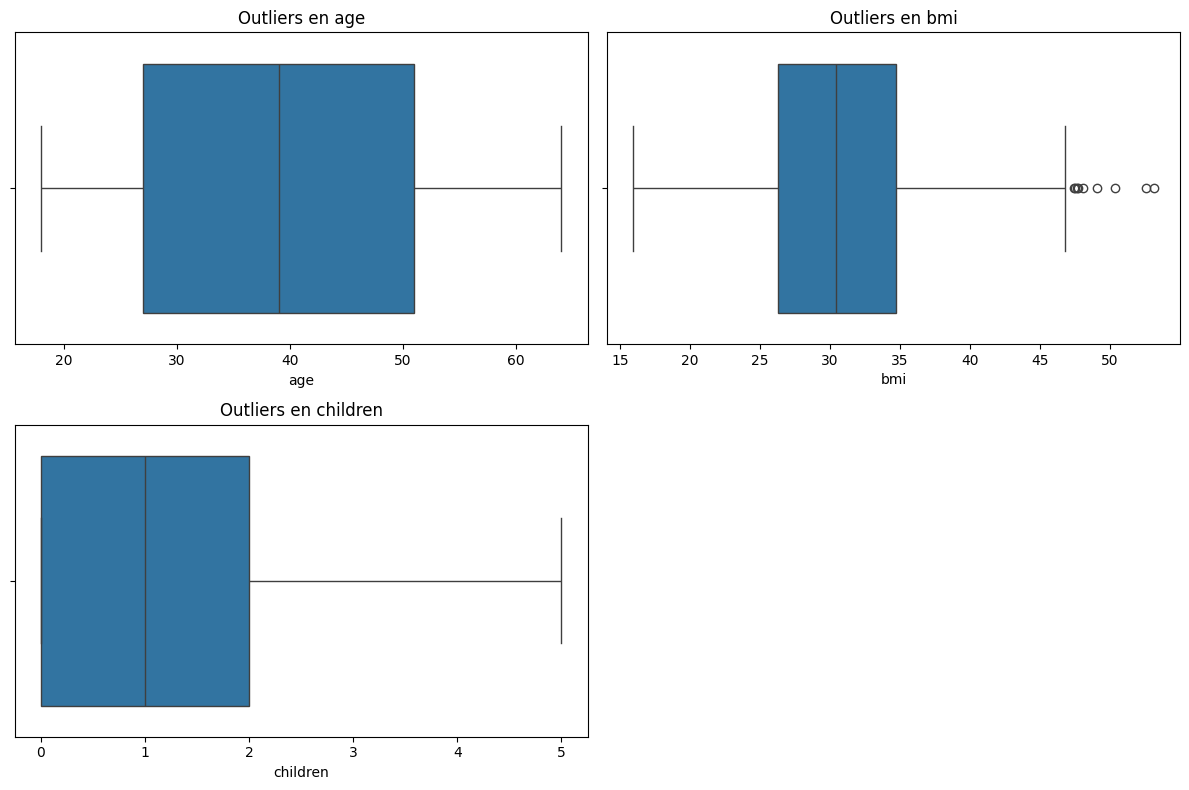

In [12]:
plt.figure(figsize=(12,8))
for i, col in enumerate(Columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Outliers en {col}')
plt.tight_layout()
plt.show()


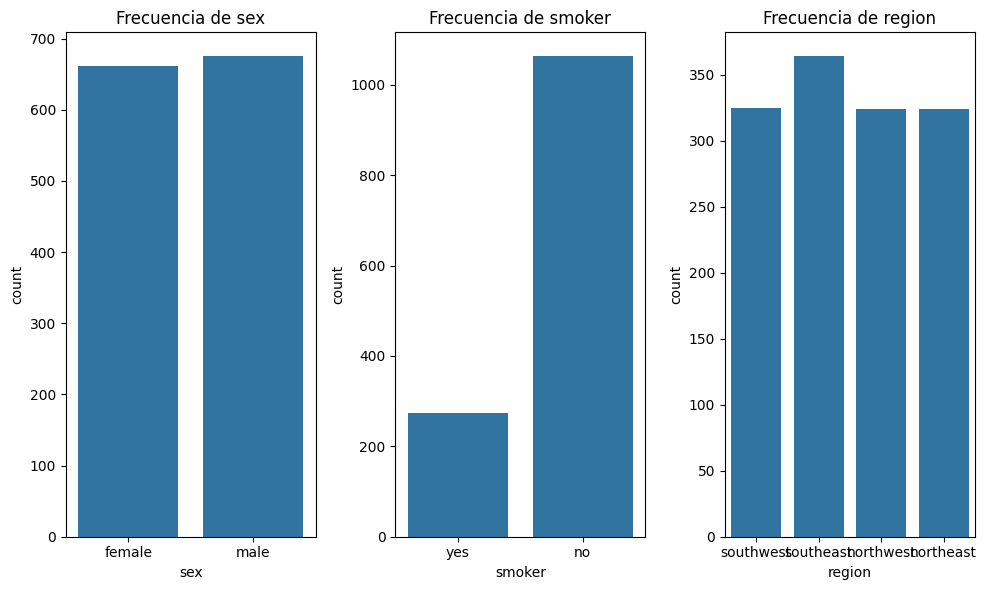

In [13]:
plt.figure(figsize=(10,6))
for i, col in enumerate(Columnas_categoricas, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=data[col])
    plt.title(f'Frecuencia de {col}')
plt.tight_layout()
plt.show()

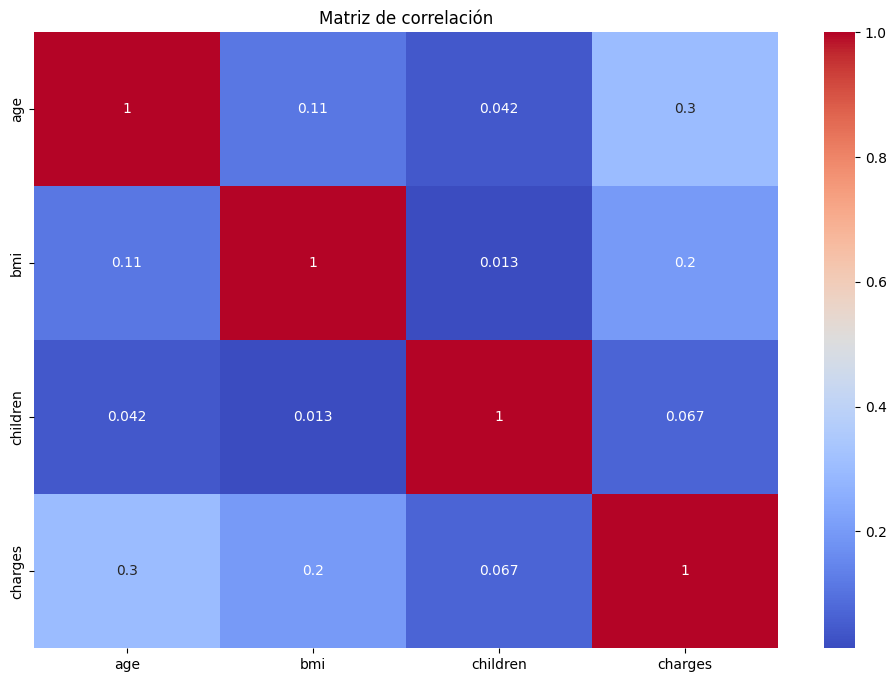

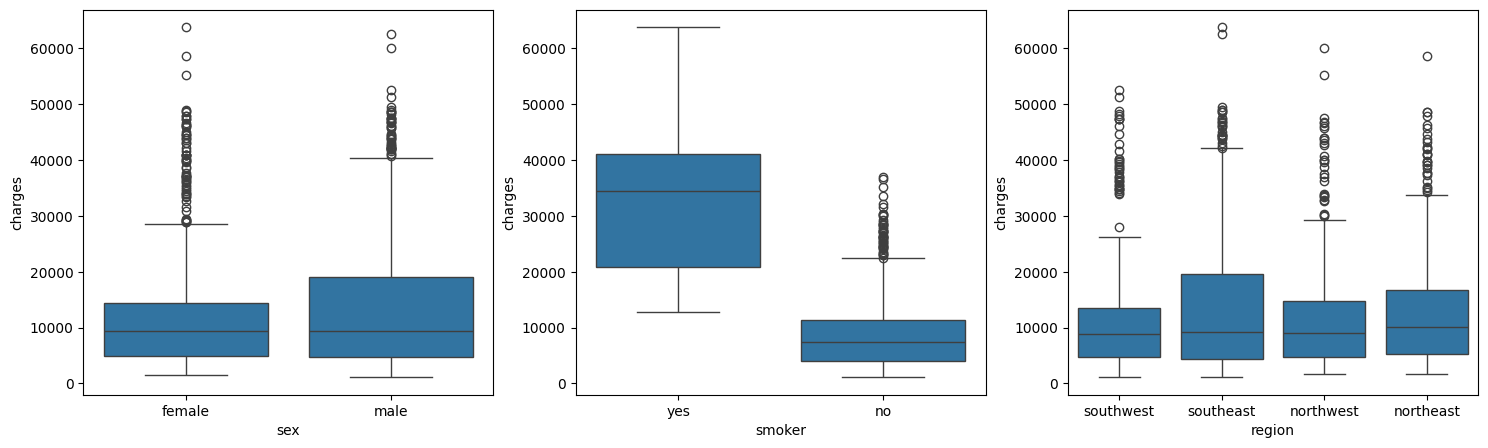

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(data[['age','bmi','children','charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.boxplot(data=data, x='sex', y='charges', ax=axes[0])
sns.boxplot(data=data, x='smoker', y='charges', ax=axes[1])
sns.boxplot(data=data, x='region', y='charges', ax=axes[2])
plt.show()

## Split

In [15]:
X = data.drop('charges', axis=1)
y = data['charges']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18,
                                                     shuffle=True )
X_train.shape, X_test.shape

((1069, 6), (268, 6))

## Scaling & Encoding

In [ ]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), Columnas_categoricas)],remainder='passthrough')
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)



array([[ 0.   ,  0.   ,  1.   , ..., 48.   , 27.93 ,  4.   ],
       [ 1.   ,  0.   ,  0.   , ..., 53.   , 28.6  ,  3.   ],
       [ 0.   ,  0.   ,  0.   , ..., 32.   , 31.54 ,  1.   ],
       ...,
       [ 1.   ,  0.   ,  1.   , ..., 52.   , 32.775,  3.   ],
       [ 0.   ,  0.   ,  0.   , ..., 47.   , 26.6  ,  2.   ],
       [ 0.   ,  1.   ,  0.   , ..., 42.   , 40.37 ,  2.   ]],
      shape=(1069, 8))

In [21]:
scaler = StandardScaler()
scaler.fit(X_train[Columnas_numericas])

X_train_scaled = scaler.transform(X_train[Columnas_numericas])
X_test_scaled = scaler.transform(X_test[Columnas_numericas])

In [22]:
X_train_cat = preprocessor.transform(X_train)
X_test_cat = preprocessor.transform(X_test)

# combinamos
X_train_final = np.hstack((X_train_scaled, X_train_cat))
X_test_final = np.hstack((X_test_scaled, X_test_cat))

## Creación del modelo y entrenamiento

In [24]:

model = LinearRegression()
model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = model.predict(X_test_final)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

F"MAE: {mae} MSE: {mse} RMSE: {rmse} R2: {r2}"

'MAE: 4475.202742841849 MSE: 40923130.79713368 RMSE: 6397.118945051255 R2: 0.7165313808459941'

## Conclusion final 

como podemos ver el resultado de las metricas tenemos un rsme de 6397 lo cual nos indica que el modelo aun no es lo suficientemente preciso para la meta que estmos buscando.
concluimos que hay que mejorar el resultado usando metodos extras como el lasso y ademas mejorar nuestras variables haciendo interacciones entre ellas. 